In [171]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from collections import Counter

from scipy.spatial.distance import pdist

In [172]:
#To calculate the Euclidian distance
def calculate_distance(test_point, data_points):
    combined = np.vstack([test_point,data_points])
    distance = pdist(combined, 'euclidean')[:len(data_points)]
    return distance

In [173]:
#To define the K-nearest neighbor function
def KNN_classification(test_point, data_points, class_labels, K):
    distance = calculate_distance(test_point, data_points)
    nearest_neighbour = np.argsort(distance)[:K]
    nearest_class = [class_labels[i] for i in nearest_neighbour]
    most_common_class = Counter(nearest_class).most_common(1)[0][0]
    return most_common_class

In [174]:
# Load the .mat file
mat_data = scipy.io.loadmat('task_9.mat')

# Extract data 
data_points = mat_data['outcomes']

#assert data_points.shape[1] == 3, "Data is not 3D. Please check the variable name."

# Determine the number of data points and classes
num_points = data_points.shape[0]
class_labels = np.zeros(num_points)
class_labels[100:] = 1

In [175]:
test_point = np.array([0.1, 0.5])
predict_class = KNN_classification(test_point, data_points, class_labels, K=3)
print(f"The predicted class for point {test_point} is: {predict_class}")

The predicted class for point [0.1 0.5] is: 1.0


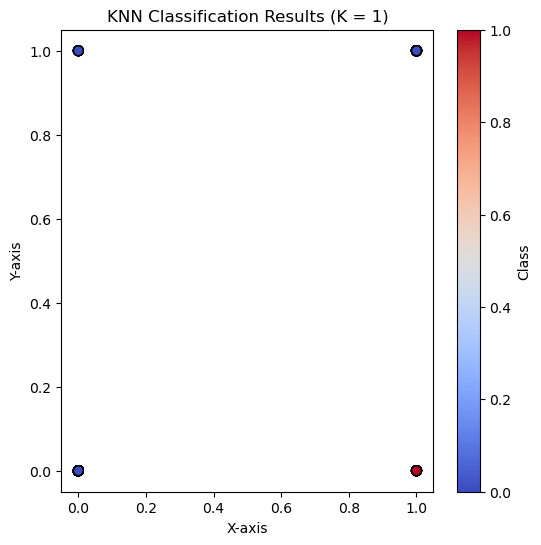

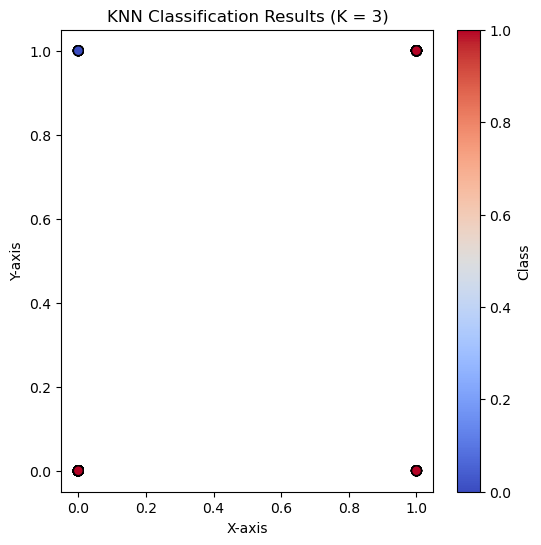

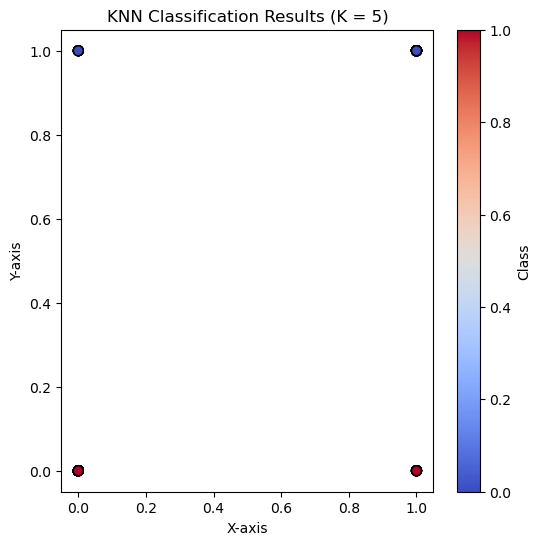

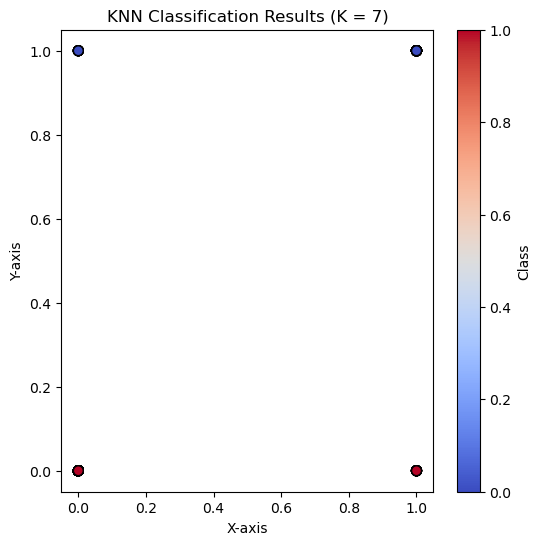

In [176]:
K_values = [1, 3, 5, 7]

for K in K_values:
    #To classify each point in the dataset based on the value of K
    predicted_class = np.zeros(num_points)
    for i in range(num_points):
        predicted_class[i] = KNN_classification(data_points[i], data_points, class_labels, K)

    #To plot the scatter plot with predicted classes for K
    plt.figure(figsize=(6, 6))
    plt.scatter(data_points[:, 0], data_points[:, 1], c=predicted_class, cmap='coolwarm', s=50, edgecolor='k')
    plt.title(f'KNN Classification Results (K = {K})')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar(label='Class')
    plt.show()


In [177]:
K_values = range(1, 26, 2)  
error_rates = []

for K in K_values:
    errors = 0
    # Leave-one-out cross-validation loop
    for i in range(num_points):
        # Remove point i from the dataset
        reduced_data_points = np.delete(data_points, i, axis=0)
        reduced_class_labels = np.delete(class_labels, i)
        
        # Classify the i-th point using the reduced dataset
        predicted_class = KNN_classification(data_points[i], reduced_data_points, reduced_class_labels, K)
        
        # Check if the classification is correct
        if predicted_class != class_labels[i]:
            errors += 1
    
    # Calculate error rate for the current K
    error_rate = errors / num_points
    error_rates.append(error_rate)
    print(f"K = {K}, Error Rate: {error_rate:.4f}")

K = 1, Error Rate: 0.5350
K = 3, Error Rate: 0.6000
K = 5, Error Rate: 0.6000
K = 7, Error Rate: 0.5400
K = 9, Error Rate: 0.5550
K = 11, Error Rate: 0.5600
K = 13, Error Rate: 0.5850
K = 15, Error Rate: 0.4650
K = 17, Error Rate: 0.4600
K = 19, Error Rate: 0.4600
K = 21, Error Rate: 0.4600
K = 23, Error Rate: 0.4600
K = 25, Error Rate: 0.4650


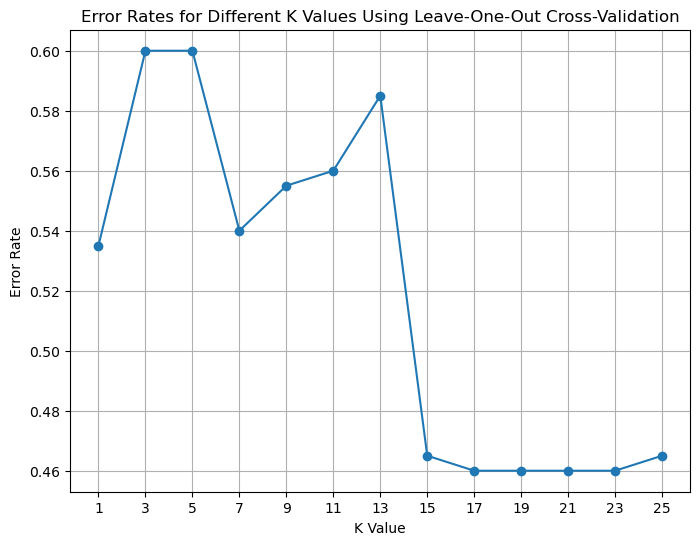

The optimal value of K is: 17


In [178]:
#To plot the figures
plt.figure(figsize=(8, 6))
plt.plot(K_values, error_rates, marker='o')
plt.title('Error Rates for Different K Values Using Leave-One-Out Cross-Validation')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(K_values)
plt.grid(True)
plt.show()

#To find the optimal K
optimal_K = K_values[np.argmin(error_rates)]
print(f"The optimal value of K is: {optimal_K}")

In [179]:
#To define the K-nearest neighbor function when there are 4 classes
def KNN_classification_multiClass(test_point, data_points, class_labels, K):
    distance = calculate_distance(test_point, data_points)
    nearest_neighbour = np.argsort(distance)[:K]
    nearest_class = [class_labels[i] for i in nearest_neighbour]
    most_common_class = Counter(nearest_class).most_common()
    max_count = most_common_class[0][1]
    tied_classes = [cls for cls, count in most_common_class if count == max_count]
    return min(tied_classes)

In [180]:
# Generate class labels for 4 classes (0, 1, 2, 3)
class_labels = np.zeros(num_points)
class_labels[50:100] = 1  # Indices 51-100 belong to class 1
class_labels[100:150] = 2  # Indices 101-150 belong to class 2
class_labels[150:200] = 3  # Indices 151-200 belong to class 3

data_points = mat_data['outcomes']
num_points = data_points.shape[0]

In [181]:
K_values = range(1, 26, 2)  
error_rates = []

for K in K_values:
    errors = 0
    # Leave-one-out cross-validation loop
    for i in range(num_points):
        # Remove point i from the dataset
        reduced_data_points = np.delete(data_points, i, axis=0)
        reduced_class_labels = np.delete(class_labels, i)
        
        # Classify the i-th point using the reduced dataset
        predicted_class = KNN_classification_multiClass(data_points[i], reduced_data_points, reduced_class_labels, K)
        
        # Check if the classification is correct
        if predicted_class != class_labels[i]:
            errors += 1
    
    # Calculate error rate for the current K
    error_rate = errors / num_points
    error_rates.append(error_rate)
    print(f"K = {K}, Error Rate: {error_rate:.4f}")

K = 1, Error Rate: 0.7550
K = 3, Error Rate: 0.7550
K = 5, Error Rate: 0.7650
K = 7, Error Rate: 0.7600
K = 9, Error Rate: 0.7400
K = 11, Error Rate: 0.7650
K = 13, Error Rate: 0.7550
K = 15, Error Rate: 0.7200
K = 17, Error Rate: 0.7200
K = 19, Error Rate: 0.7200
K = 21, Error Rate: 0.7200
K = 23, Error Rate: 0.7200
K = 25, Error Rate: 0.7200


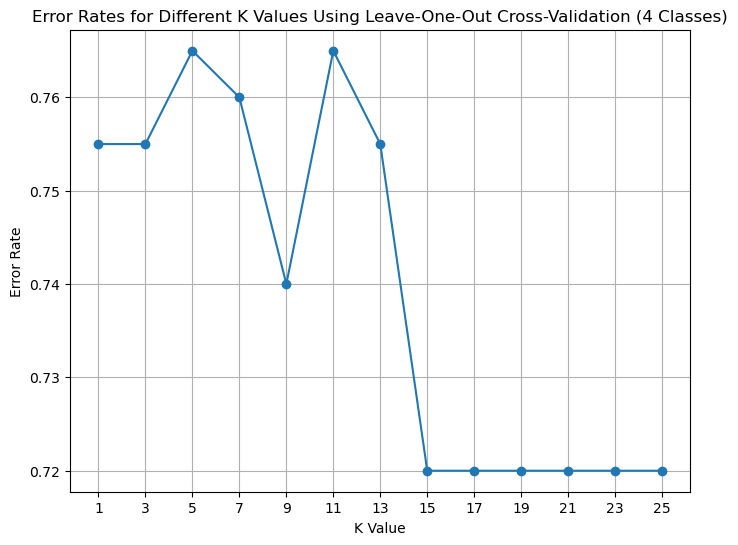

The optimal value of K is: 15


In [182]:
#To plot the figures
plt.figure(figsize=(8, 6))
plt.plot(K_values, error_rates, marker='o')
plt.title('Error Rates for Different K Values Using Leave-One-Out Cross-Validation (4 Classes)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(K_values)
plt.grid(True)
plt.show()

#To find the optimal K
optimal_K = K_values[np.argmin(error_rates)]
print(f"The optimal value of K is: {optimal_K}")